# Logistic regression model using text data vectorized with TF-IDF

In [1]:
#import packages

import numpy as np

import pandas as pd 

from sklearn.model_selection import KFold, cross_validate

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, classification_report

import matplotlib as plt

from time import process_time

In [2]:
#import data

%store -r x_text_train_tf
%store -r x_text_test_tf
%store -r y_text_train_tf
%store -r y_text_test_tf


In [3]:
#rename variables for ease of use

x_train = x_text_train_tf
x_test = x_text_test_tf
y_train = y_text_train_tf
y_test = y_text_test_tf

In [4]:
#define model

lr = LogisticRegression()

In [5]:
#define scoring metrics for cross validation

scorer = {'accuracy': make_scorer(accuracy_score),
          'precision': make_scorer(precision_score),
          'recall': make_scorer(recall_score),
          'f1_score' : make_scorer(f1_score)
          }

In [6]:
#define KFold

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)

In [7]:
#cross validate on training set to check model stability

cv_scores_tfidf_text_lr = cross_validate(lr, x_train, y_train, cv = k_folds, scoring=scorer)

In [8]:
#check cross validation scores

cv_scores_tfidf_text_lr

{'fit_time': array([1.18282461, 1.05913854, 1.55085373, 1.08709288, 1.27958012]),
 'score_time': array([0.0209434 , 0.01894975, 0.01595926, 0.01695371, 0.01795053]),
 'test_accuracy': array([0.93900951, 0.94157111, 0.93973405, 0.93558619, 0.93082835]),
 'test_precision': array([0.9326212 , 0.93564494, 0.93751743, 0.92837691, 0.9171695 ]),
 'test_recall': array([0.93058213, 0.93176796, 0.92564032, 0.92787153, 0.92657246]),
 'test_f1_score': array([0.93160055, 0.93370242, 0.93154102, 0.92812415, 0.921847  ])}

In [9]:
#fit model on the whole training set
start = process_time()

lr.fit(x_train, y_train)

end=process_time()

In [10]:
#test model on test set

y_pred = lr.predict(x_test)

In [11]:
#view classification report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      9762
           1       0.93      0.93      0.93      7805

    accuracy                           0.94     17567
   macro avg       0.94      0.94      0.94     17567
weighted avg       0.94      0.94      0.94     17567



In [12]:
#view confusion matrix

conf_matrix=confusion_matrix(y_test, y_pred)


[Text(0.5, 1.0, 'Logistic Regression model with Text Data (TF-IDF)'),
 Text(0.5, 0, 'Predicted'),
 Text(0, 0.5, 'Actual')]

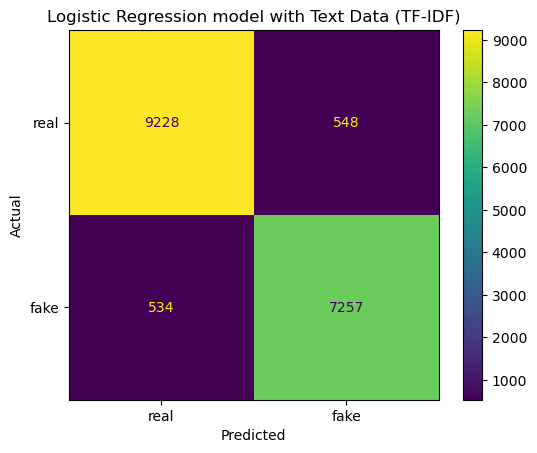

In [13]:
cm_plot = ConfusionMatrixDisplay(conf_matrix, display_labels = ['real', 'fake'])
cm_plot.plot(values_format='')
cm_plot.ax_.set(
                title='Logistic Regression model with Text Data (TF-IDF)', 
                xlabel='Predicted', 
                ylabel='Actual')

In [14]:
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
fit_time=end-start

In [15]:
dict = {'data type': 'text',
        'model type':'logistic regression',
        'vectorize type':'TF-IDF',
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'fit time': fit_time
       }

In [16]:
tfidf_text_lr=pd.DataFrame.from_dict([dict])

In [17]:
tfidf_text_lr

,data type,model type,vectorize type,accuracy,precision,recall,f1,fit time
0,text,logistic regression,TF-IDF,0.938407,0.929789,0.931459,0.930623,5.078125


In [18]:
#save results for later use

%store tfidf_text_lr

Stored 'tfidf_text_lr' (DataFrame)
